In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
now = datetime.now()
start = datetime(now.year-10, now.month, now.day)
end = now
ticker = "AAPL"
df = yf.download(ticker,start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,107.731533,108.806495,106.540222,107.624863,1.054427e+08
std,70.116611,70.795802,69.345289,70.033911,5.928006e+07
min,20.624050,20.927678,20.425436,20.546428,2.323470e+07
25%,40.420879,40.851840,40.204890,40.481968,6.491175e+07
50%,111.911171,113.370247,110.471576,111.911183,9.155720e+07
75%,168.569839,170.024043,167.055357,168.173404,1.295181e+08
max,258.103729,259.179926,256.718662,257.276679,5.334788e+08


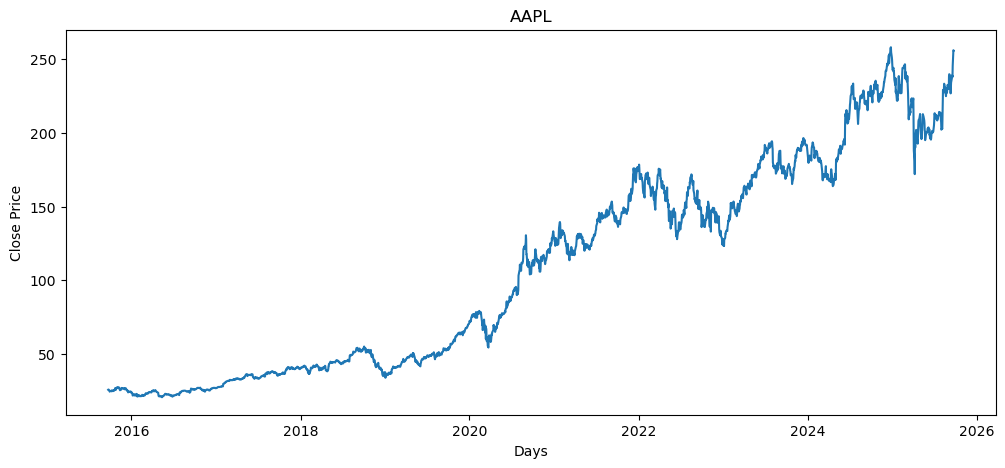

In [3]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel("Days");
plt.ylabel("Close Price");

In [4]:
df['MA100'] = df.Close.rolling(100).mean()

Text(0, 0.5, 'Close Price')

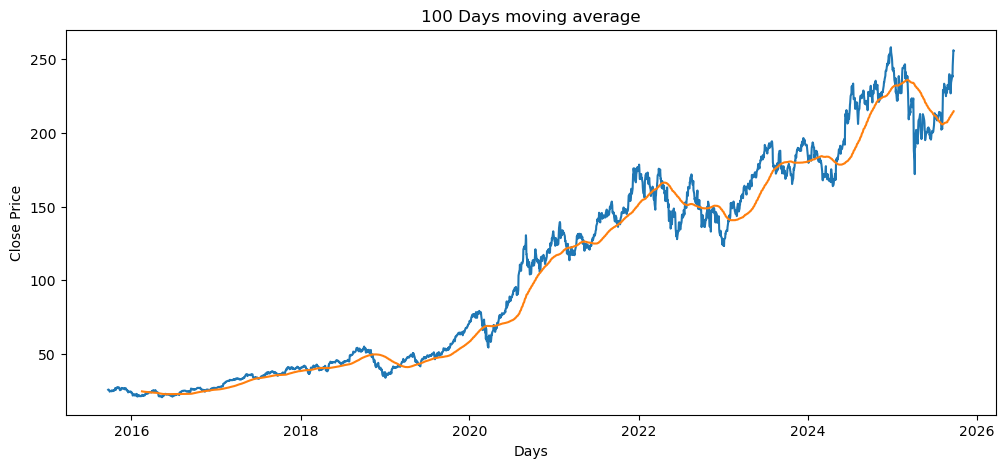

In [5]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close);
plt.plot(df["MA100"]);
plt.title("100 Days moving average")
plt.xlabel("Days")
plt.ylabel("Close Price")

Text(0, 0.5, 'Close Price')

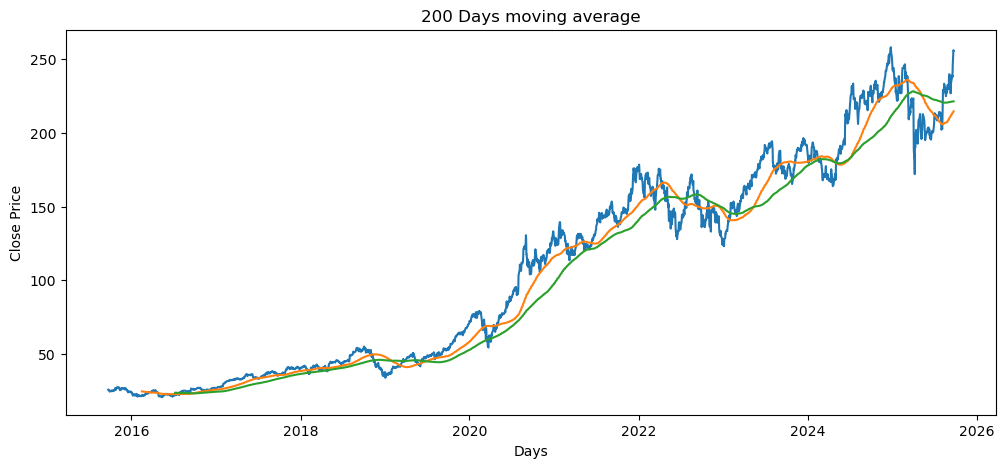

In [6]:
df['MA200'] = df.Close.rolling(200).mean()
plt.figure(figsize=(12, 5))
plt.plot(df.Close);
plt.plot(df["MA100"]);
plt.plot(df["MA200"]);
plt.title("200 Days moving average")
plt.xlabel("Days")
plt.ylabel("Close Price")


In [7]:
df["Percentage Changed"] = df.Close.pct_change()
df[["Close", "Percentage Changed"]]

Price,Close,Percentage Changed
Ticker,AAPL,
Date,,
2015-09-23,25.690628,NaN
2015-09-24,25.843435,0.005948
2015-09-25,25.778269,-0.002522
2015-09-28,25.268145,-0.019789
2015-09-29,24.508570,-0.030061
...,...,...
2025-09-17,238.990005,0.003527
2025-09-18,237.880005,-0.004645


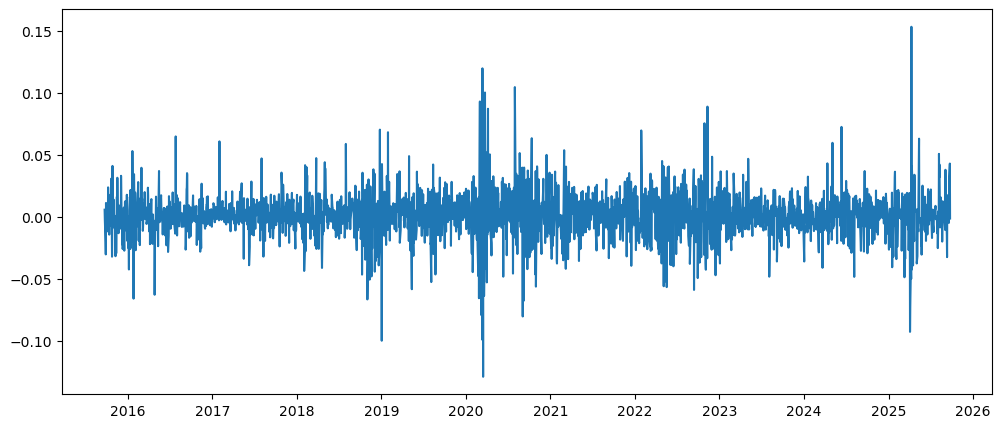

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(df["Percentage Changed"])

# Split training data and testing data 

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df.reset_index()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-09-23,25.690624,25.780515,25.461405,25.535563,143026800
1,2015-09-24,25.843435,25.955798,25.252408,25.450166,200878000
2,2015-09-25,25.778273,26.223230,25.623211,26.167049,224607600
3,2015-09-28,25.268148,25.746813,25.268148,25.585011,208436000
4,2015-09-29,24.508568,25.508598,24.238898,25.355784,293461600
...,...,...,...,...,...,...
2510,2025-09-17,238.990005,240.100006,237.729996,238.970001,46508000
2511,2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600
2512,2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300


In [57]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])
print(data_training, data_testing)

Ticker            AAPL
Date                  
2015-09-23   25.690624
2015-09-24   25.843435
2015-09-25   25.778273
2015-09-28   25.268148
2015-09-29   24.508568
...                ...
2022-09-13  151.449326
2022-09-14  152.896469
2022-09-15  150.002136
2022-09-16  148.358109
2022-09-19  152.079361

[1760 rows x 1 columns] Ticker            AAPL
Date                  
2022-09-20  154.461746
2022-09-21  151.331161
2022-09-22  150.366394
2022-09-23  148.092285
2022-09-26  148.427017
...                ...
2025-09-17  238.990005
2025-09-18  237.880005
2025-09-19  245.500000
2025-09-22  256.079987
2025-09-23  255.779999

[755 rows x 1 columns]


In [58]:
data_training_array = scaler.fit_transform(data_training)

# Sequenece Creation

In [59]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [60]:
x_train.shape

(1660, 100, 1)

In [61]:
y_train.shape

(1660,)

# Model building

In [62]:
import tensorflow as tf
print(tf.__version__)

2.18.1


In [63]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [64]:
model = Sequential()
model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation="tanh", return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# Model training

In [65]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - loss: 0.0146
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 332ms/step - loss: 5.8558e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 325ms/step - loss: 5.3059e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - loss: 5.0247e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 332ms/step - loss: 4.7611e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 336ms/step - loss: 5.3046e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 343ms/step - loss: 4.5477e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 352ms/step - loss: 4.4759e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 343ms/step - loss: 4.5529e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - loss: 4.1810e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step - loss: 4.1434e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 338ms/step - loss: 4.2920e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 334ms/step - loss: 4.4054e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - loss: 4.

In [66]:
model.summary

<bound method Model.summary of <Sequential name=sequential_1, built=True>>

In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [68]:
model.save("Stock_prediction_model.keras")

# Preparing Test Data

In [69]:
past_100_days = data_training.tail(100)

In [70]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [71]:
input_data = scaler.fit_transform(final_df)

In [72]:
input_data

array([[2.25600108e-01],
       [2.77077065e-01],
       [2.33463530e-01],
       [2.35720845e-01],
       [2.46788080e-01],
       [2.94405816e-01],
       [2.27055903e-01],
       [2.32452181e-01],
       [1.94388958e-01],
       [2.12253828e-01],
       [1.53846593e-01],
       [1.25117074e-01],
       [1.58295014e-01],
       [1.46846712e-01],
       [1.73826288e-01],
       [1.12429258e-01],
       [8.71269638e-02],
       [8.88770191e-02],
       [1.29127726e-01],
       [1.09075259e-01],
       [1.10242000e-01],
       [1.34013123e-01],
       [1.76742859e-01],
       [1.70909265e-01],
       [1.69961635e-01],
       [1.88190935e-01],
       [1.45679970e-01],
       [1.51221567e-01],
       [1.69961635e-01],
       [1.64492584e-01],
       [1.25700389e-01],
       [8.55227935e-02],
       [4.72409126e-02],
       [5.36579332e-02],
       [7.31267473e-02],
       [3.39701216e-02],
       [4.49077695e-02],
       [7.63352010e-02],
       [7.25434332e-02],
       [9.38354150e-02],


In [73]:
input_data.shape

(855, 1)

In [74]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [75]:
y_test

[np.float64(0.2312702738842859),
 np.float64(0.20805020937454966),
 np.float64(0.20089436962158314),
 np.float64(0.1840269279681267),
 np.float64(0.18650969097539927),
 np.float64(0.19373830351469346),
 np.float64(0.1797188469236889),
 np.float64(0.12597710622467073),
 np.float64(0.09472475957110682),
 np.float64(0.12575776927303217),
 np.float64(0.15240981196723002),
 np.float64(0.15460046523653614),
 np.float64(0.14751739826989774),
 np.float64(0.10852544509528117),
 np.float64(0.11093475625445592),
 np.float64(0.10042027698816403),
 np.float64(0.09574697388854714),
 np.float64(0.12970085461621383),
 np.float64(0.09603919680347517),
 np.float64(0.12546588588898888),
 np.float64(0.13525014739884533),
 np.float64(0.13605347747249363),
 np.float64(0.13262149928803202),
 np.float64(0.16095297491585436),
 np.float64(0.1768709750381986),
 np.float64(0.1979734985958418),
 np.float64(0.1761410968126481),
 np.float64(0.14291743384141686),
 np.float64(0.22280011007591283),
 np.float64(0.205275

In [76]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [77]:
x_test[0].shape


(100, 1)

In [78]:
y_test

array([2.31270274e-01, 2.08050209e-01, 2.00894370e-01, 1.84026928e-01,
       1.86509691e-01, 1.93738304e-01, 1.79718847e-01, 1.25977106e-01,
       9.47247596e-02, 1.25757769e-01, 1.52409812e-01, 1.54600465e-01,
       1.47517398e-01, 1.08525445e-01, 1.10934756e-01, 1.00420277e-01,
       9.57469739e-02, 1.29700855e-01, 9.60391968e-02, 1.25465886e-01,
       1.35250147e-01, 1.36053477e-01, 1.32621499e-01, 1.60952975e-01,
       1.76870975e-01, 1.97973499e-01, 1.76141097e-01, 1.42917434e-01,
       2.22800110e-01, 2.05275563e-01, 1.85633362e-01, 1.44596527e-01,
       9.96901724e-02, 9.77154608e-02, 1.01664997e-01, 1.05906870e-01,
       7.20430779e-02, 1.59811246e-01, 1.80509841e-01, 1.70123930e-01,
       1.82996678e-01, 1.73854356e-01, 1.87970240e-01, 1.92139226e-01,
       1.68149219e-01, 1.84020703e-01, 1.90530303e-01, 1.68880908e-01,
       1.40429125e-01, 1.18121267e-01, 1.68295557e-01, 1.70343494e-01,
       1.66686293e-01, 1.58055871e-01, 1.30847790e-01, 1.16439231e-01,
      

# Making Predictions

In [79]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step


In [80]:
y_predicted

array([[0.19984634],
       [0.20788012],
       [0.20913537],
       [0.20599076],
       [0.19726336],
       [0.19036342],
       [0.1881951 ],
       [0.18382706],
       [0.16440591],
       [0.1380835 ],
       [0.12561609],
       [0.12775797],
       [0.13482162],
       [0.13983296],
       [0.13208637],
       [0.12322914],
       [0.11348682],
       [0.10481995],
       [0.10757266],
       [0.10452937],
       [0.10820679],
       [0.11574181],
       [0.12284884],
       [0.12697895],
       [0.13685974],
       [0.15041797],
       [0.16765654],
       [0.17452182],
       [0.1662236 ],
       [0.1795041 ],
       [0.189931  ],
       [0.19049732],
       [0.1755741 ],
       [0.14802285],
       [0.12467798],
       [0.10998968],
       [0.10300721],
       [0.0918614 ],
       [0.1047885 ],
       [0.12875284],
       [0.14765619],
       [0.16347457],
       [0.17086077],
       [0.17746429],
       [0.18284707],
       [0.17878807],
       [0.17787138],
       [0.179

In [81]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()

In [82]:
y_predicted

array([150.2251  , 151.30824 , 151.47746 , 151.0535  , 149.87686 ,
       148.9466  , 148.65425 , 148.06534 , 145.44693 , 141.89809 ,
       140.2172  , 140.50597 , 141.4583  , 142.13396 , 141.08952 ,
       139.89539 , 138.5819  , 137.4134  , 137.78455 , 137.37424 ,
       137.87003 , 138.88591 , 139.8441  , 140.40094 , 141.73308 ,
       143.56105 , 145.8852  , 146.81079 , 145.69199 , 147.4825  ,
       148.88828 , 148.96465 , 146.95265 , 143.23813 , 140.09071 ,
       138.11041 , 137.16902 , 135.6663  , 137.40916 , 140.6401  ,
       143.1887  , 145.32137 , 146.3172  , 147.20749 , 147.93321 ,
       147.38597 , 147.26237 , 147.54335 , 146.98569 , 145.23732 ,
       142.82434 , 142.79736 , 143.5867  , 144.30965 , 144.49103 ,
       143.40797 , 141.71577 , 140.76448 , 140.15901 , 140.4591  ,
       141.24321 , 141.3627  , 139.44963 , 136.95184 , 134.4083  ,
       132.48344 , 131.96771 , 131.30975 , 130.68633 , 129.80933 ,
       128.16678 , 127.417816, 127.2274  , 126.22813 , 125.434

In [83]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [84]:
y_test

array([154.46174622, 151.3311615 , 150.36639404, 148.09228516,
       148.42701721, 149.40159607, 147.51145935, 140.26586914,
       136.05235291, 140.23629761, 143.82958984, 144.12493896,
       143.16998291, 137.91299438, 138.23782349, 136.82023621,
       136.19017029, 140.76791382, 136.22956848, 140.19694519,
       141.51608276, 141.62438965, 141.16168213, 144.98139954,
       147.12750244, 149.97259521, 147.02909851, 142.54980469,
       153.31977844, 150.95707703, 148.30886841, 142.77618408,
       136.72180176, 136.45556641, 136.98805237, 137.55995178,
       132.99435425, 144.82746887, 147.61810303, 146.21784973,
       147.9533844 , 146.72079468, 148.62393188, 149.18600464,
       145.95161438, 148.09144592, 148.96908569, 146.05026245,
       142.21432495, 139.20672607, 145.97134399, 146.24745178,
       145.75437927, 144.59080505, 140.92254639, 138.97994995,
       140.66616821, 140.18296814, 142.48057556, 143.44694519,
       141.21836853, 134.60169983, 132.63937378, 130.52

(140.0, 500.0)

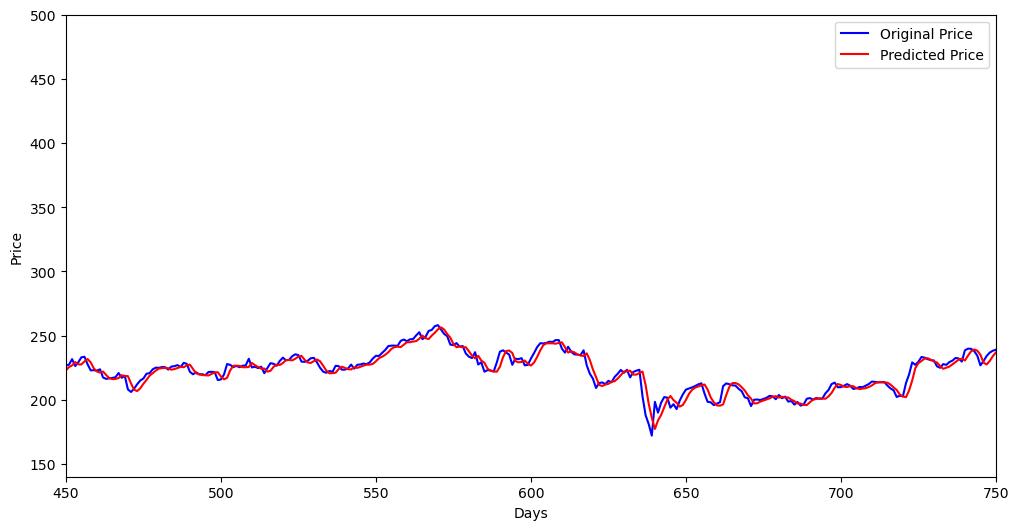

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, "b", label="Original Price")
plt.plot(y_predicted, "r", label="Predicted Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 500)


# Model Evaluation

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 15.781323790537126


In [97]:
# Root mean squared error
rmse = np.sqrt(mse)

In [98]:
print(rmse)

3.972571433031397


In [99]:
r2 = r2_score(y_test, y_predicted)

In [100]:
print(r2)

0.9844095732885582
